# WeatherPy
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pprint

# Set the seed
np.random.seed(11)

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607
['new norfolk', 'adamstown', 'atafu village', 'cole harbour', 'howard springs', 'puerto ayora', 'puerto natales', 'fuvahmulah', 'bethel', 'nizhnesortymskiy', 'viana do castelo', 'grytviken', 'udachny', 'qaqortoq', 'edinburgh of the seven seas', 'cabanas', 'albany', 'west island', 'waitangi', 'rabo de peixe', 'peterhead', 'luderitz', 'kingston', 'port-aux-francais', 'hami', 'ribeira grande', 'ushuaia', 'uturoa', 'iqaluit', 'tamayo', 'mabaruma', 'bilibino', 'vorgashor', 'port augusta', 'kachug', 'blackmans bay', 'invercargill', 'port elizabeth', 'laguna', 'yarovoye', 'bezenchuk', 'kavaratti', 'waimea', 'inhambane', 'hermanus', 'gurupi', 'brookings', 'tralee', 'murray bridge', 'roanoke rapids', 'shiguai', 'yellowknife', 'minas de marcona', 'papao', 'yerofey pavlovich', 'khor', 'tazacorte', 'happy valley-goose bay', 'putian', 'olonkinbyen', 'pirot', 'longyearbyen', 'paradip garh', 'suva', 'ayaguz', 'jamestown', 'zouerate', 'santiago', 'mokopane', 'ajaccio'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f'{url}appid={weather_api_key}&units={units}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{query_url}&q={city}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lon']
        city_lng = city_weather['coord']['lat']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | atafu village
Processing Record 4 of Set 1 | cole harbour
Processing Record 5 of Set 1 | howard springs
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | nizhnesortymskiy
Processing Record 11 of Set 1 | viana do castelo
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | udachny
Processing Record 14 of Set 1 | qaqortoq
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | cabanas
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | rabo de peixe
Processing Record 21 of Set 1 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,147.0587,-42.7826,9.84,65,40,4.70,AU,1730045080
1,adamstown,-130.1015,-25.0660,21.60,85,99,7.27,PN,1730045080
2,atafu village,-172.5159,-8.5421,28.03,72,100,6.62,TK,1730045080
3,cole harbour,-63.4751,44.6724,7.62,51,7,9.77,CA,1730045080
4,howard springs,131.0470,-12.4970,29.95,78,7,1.32,AU,1730045080


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,147.0587,-42.7826,9.84,65,40,4.70,AU,1730045080
1,adamstown,-130.1015,-25.0660,21.60,85,99,7.27,PN,1730045080
2,atafu village,-172.5159,-8.5421,28.03,72,100,6.62,TK,1730045080
3,cole harbour,-63.4751,44.6724,7.62,51,7,9.77,CA,1730045080
4,howard springs,131.0470,-12.4970,29.95,78,7,1.32,AU,1730045080


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

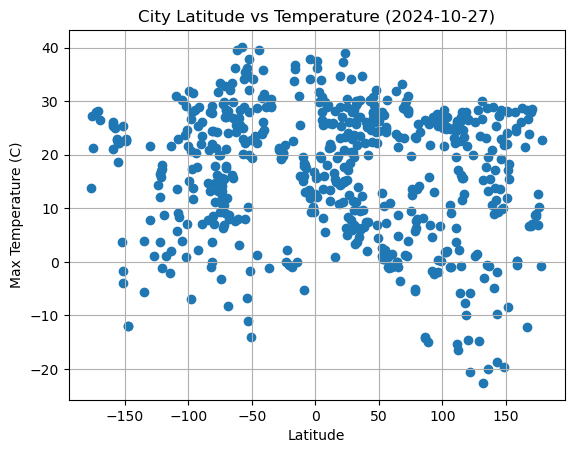

In [86]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']
# display_date_UTC = city_data_df["Date"][0]
display_date = pd.to_datetime(city_data_df["Date"][0], unit='s').strftime('%Y-%m-%d')
# display_date = pd.to_datetime(display_date_UTC).tz_localize('UTC').tz_convert('America/New_York').date()
plt.scatter(x, y)

# Incorporate the other graph properties
plt.title(f'City Latitude vs Temperature ({display_date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

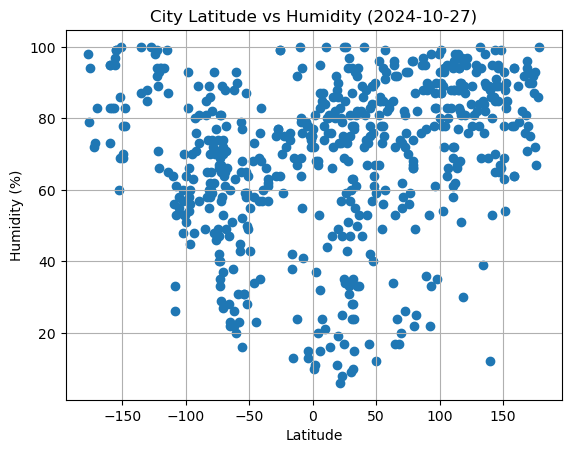

In [87]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

y = city_data_df['Humidity']
plt.scatter(x, y)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f'City Latitude vs Humidity ({display_date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

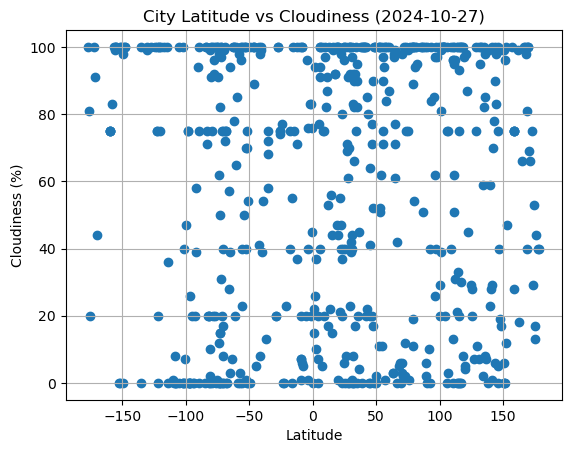

In [88]:
# Build the scatter plots for latitude vs. cloudiness
y = city_data_df['Cloudiness']
plt.scatter(x, y)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f'City Latitude vs Cloudiness ({display_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

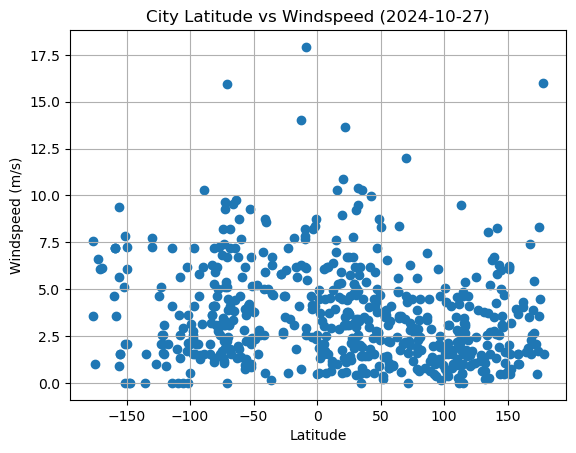

In [89]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
y = city_data_df['Wind Speed']
plt.scatter(x, y)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f'City Latitude vs Windspeed ({display_date})')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (m/s)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [106]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x, y, xlabel, ylabel, title):
    # Set data ranges forformatting plots 
    x_min = min(x)
    x_max = max(x)
    x_range = x_max - x_min
    y_min = min(y)
    y_max = max(y)
    y_range = y_max - y_min
    
    # Calc regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    # Calc regress values for y values on line 
    regress_values = x * slope + intercept
    # Format regression equation for display
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Print the r^2 value
    print(f'The r^2-value is: {rvalue**2}')
    
    # plot the regression
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,
                 (x_min+x_range*0.05,y_max+y_range*0.1),
                 fontsize=15,
                 color="red")
   
    # plot the data
    plt.scatter(x, y)
    
    # Format plt
    # # [xmin, xmax, ymin, ymax]
    plt.axis([x_min-x_range*0.05, 
              x_max+x_range*0.05, 
              y_min-y_range*0.05, 
              y_max+y_range*0.2])
    plt.title(f'{title} ({display_date})')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    # Show plot
    plt.show()

In [113]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0].sort_values(by='Lat')

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
531,sainte-adresse,0.0845,49.5089,15.59,77,0,2.57,FR,1730045129
406,margate,1.3862,51.3813,12.15,72,22,0.52,GB,1730045116
387,kidal,1.4078,18.4411,36.21,10,15,4.49,ML,1730045115
454,tillaberi,1.4531,14.2117,37.52,11,26,4.98,NE,1730045121
544,caussade,1.5391,44.1608,15.93,81,94,1.87,FR,1730045130


In [114]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0].sort_values(by='Lat')

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
17,waitangi,-176.5597,-43.9535,13.79,98,100,3.58,NZ,1730045082
547,mata-utu,-176.1745,-13.2816,27.23,79,81,7.55,WF,1730045130
107,nuku'alofa,-175.2000,-21.1333,21.19,94,20,1.03,TO,1730045090
2,atafu village,-172.5159,-8.5421,28.03,72,100,6.62,TK,1730045080
310,fale old settlement,-171.2468,-9.3852,28.10,73,91,6.09,TK,1730045108


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.04662375421360266


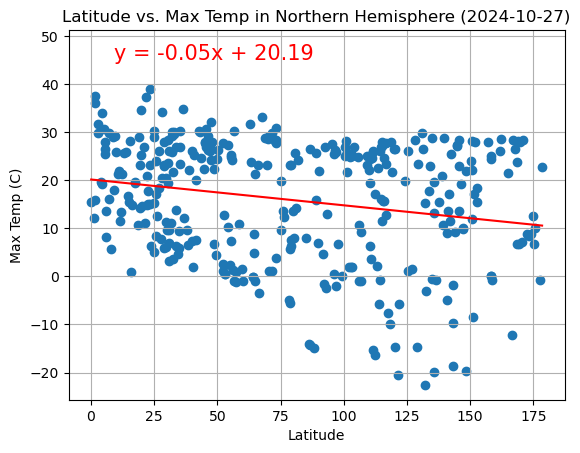

In [115]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], 
                       northern_hemi_df['Max Temp'], 
                       'Latitude', 'Max Temp (C)', 
                       'Latitude vs. Max Temp in Northern Hemisphere')

The r^2-value is: 0.01015593933779794


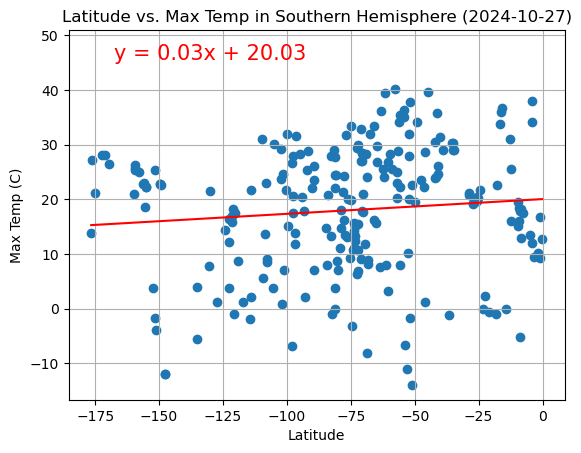

In [116]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], 
                       southern_hemi_df['Max Temp'], 
                       'Latitude', 'Max Temp (C)', 
                       'Latitude vs. Max Temp in Southern Hemisphere')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.12724820412052412


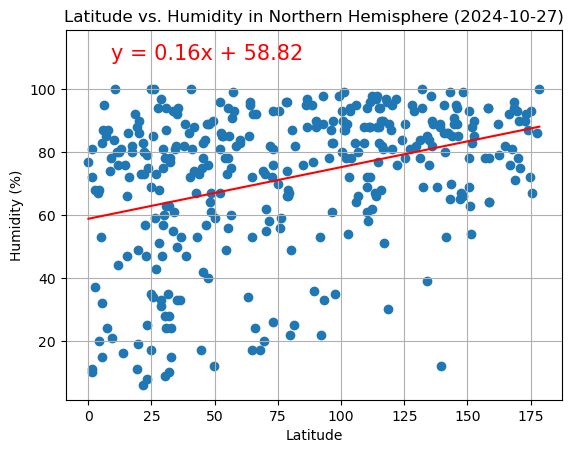

In [117]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], 
                       northern_hemi_df['Humidity'], 
                       'Latitude', 'Humidity (%)', 
                       'Latitude vs. Humidity in Northern Hemisphere')

The r^2-value is: 0.10566266453147632


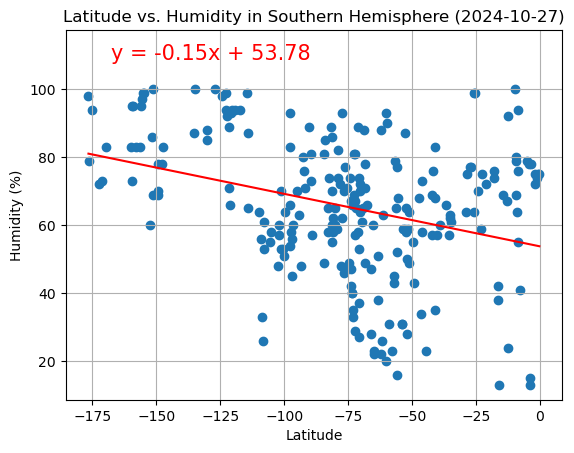

In [118]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], 
                       southern_hemi_df['Humidity'], 
                       'Latitude', 'Humidity (%)', 
                       'Latitude vs. Humidity in Southern Hemisphere')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 5.3256490403224546e-05


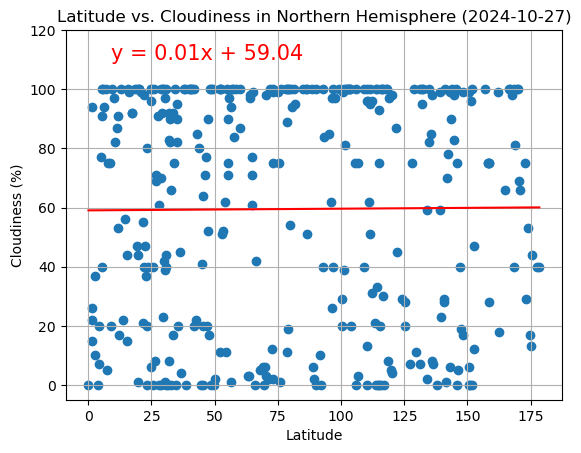

In [119]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], 
                       northern_hemi_df['Cloudiness'], 
                       'Latitude', 'Cloudiness (%)', 
                       'Latitude vs. Cloudiness in Northern Hemisphere')

The r^2-value is: 0.008844627739416832


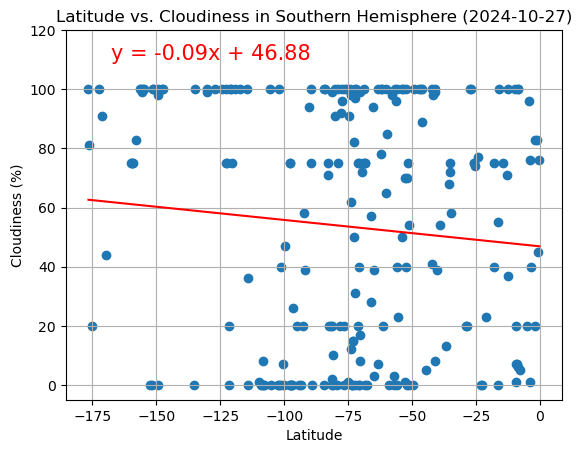

In [120]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], 
                       southern_hemi_df['Cloudiness'], 
                       'Latitude', 'Cloudiness (%)', 
                       'Latitude vs. Cloudiness in Southern Hemisphere')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.017252801555987192


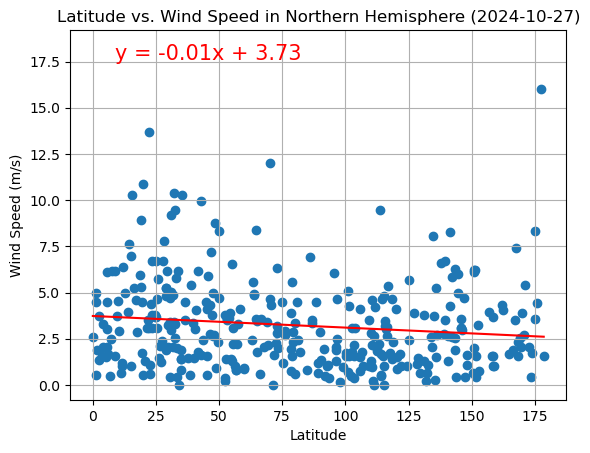

In [121]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], 
                       northern_hemi_df['Wind Speed'], 
                       'Latitude', 'Wind Speed (m/s)', 
                       'Latitude vs. Wind Speed in Northern Hemisphere')

The r^2-value is: 0.025900982550436956


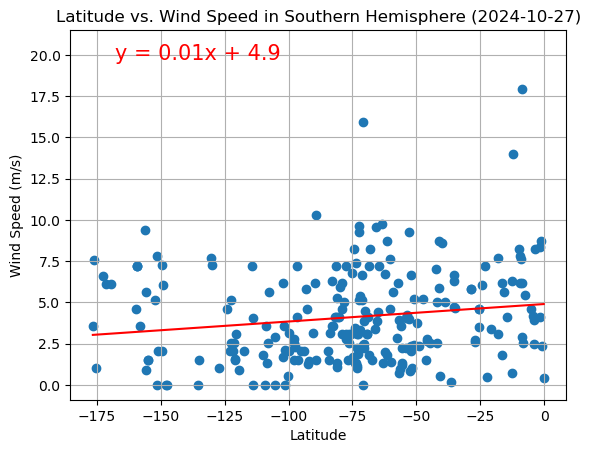

In [122]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], 
                       southern_hemi_df['Wind Speed'], 
                       'Latitude', 'Wind Speed (m/s)', 
                       'Latitude vs. Wind Speed in Southern Hemisphere')

**Discussion about the linear relationship:** YOUR RESPONSE HERE